## Trading Probability and Surplus

The point of this notebook is to compute the average number of trades and the expected surplus in the reverse directed search model 2 tier case.  The question is what happens when the difference in quality  between the 2 tiers increases.  This is part of a bigger question about what happens when the accuracy of the mapinator classification improves.  Does this create enough friction (competition for the top tier candates) to make things worse off.

In [1]:
using SymPy, Plots
x,z,y, v_1, v_2, alpha_1, alpha_2 = symbols("x,z,y, v_1, v_2,  alpha_1, alpha_2")

(x, z, y, v_1, v_2, alpha_1, alpha_2)

There are two functions
$$
Q_1(x) = e^{-(\frac{1-y}{\alpha_1})}
$$
when $y>z$ and
$$
Q_1(x) = e^{-\bar{\pi}\frac{z-y}{\alpha_1}-\frac{1-z}{\alpha_1}}
$$
otherwise.

In [2]:
# find the cutoff

z=1+alpha_1*log(v_2/v_1)

      ⎛v₂⎞    
α₁⋅log⎜──⎟ + 1
      ⎝v₁⎠    

In [3]:

pi = alpha_1/(alpha_1 + alpha_2)

   α₁  
───────
α₁ + α₂

In [4]:
Q_1 = exp(-max(z-x,0)*pi/alpha_1-(1-max(x,z))/alpha_1)

   Max(0, alpha_1*log(v_2/v_1) - x + 1)   1 - Max(x, alpha_1*log(v_2/v_1) + 1)
 - ──────────────────────────────────── - ────────────────────────────────────
                 α₁ + α₂                                   α₁                 
ℯ                                                                             

In [5]:
pbar = sympy.Piecewise((pi, Le(x,z)), (1, Gt(x,z)))

⎧   α₁                  ⎛v₂⎞    
⎪───────  for x ≤ α₁⋅log⎜──⎟ + 1
⎨α₁ + α₂                ⎝v₁⎠    
⎪                               
⎩   1           otherwise       

In [6]:
Q_2 = exp(-(z-x)*(1-pi)/alpha_2)

 ⎛     α₁      ⎞ ⎛        ⎛v₂⎞        ⎞
 ⎜- ─────── + 1⎟⋅⎜- α₁⋅log⎜──⎟ + x - 1⎟
 ⎝  α₁ + α₂    ⎠ ⎝        ⎝v₁⎠        ⎠
 ──────────────────────────────────────
                   α₂                  
ℯ                                      

In [7]:
Prob1 = pbar*Q_1
Prob2 = (1-pbar)*Q_2

                                          ⎛     α₁      ⎞ ⎛        ⎛v₂⎞       
                                          ⎜- ─────── + 1⎟⋅⎜- α₁⋅log⎜──⎟ + x - 
                                          ⎝  α₁ + α₂    ⎠ ⎝        ⎝v₁⎠       
⎛    ⎛⎧   α₁                  ⎛v₂⎞    ⎞⎞  ────────────────────────────────────
⎜    ⎜⎪───────  for x ≤ α₁⋅log⎜──⎟ + 1⎟⎟                    α₂                
⎜1 - ⎜⎨α₁ + α₂                ⎝v₁⎠    ⎟⎟⋅ℯ                                    
⎜    ⎜⎪                               ⎟⎟                                      
⎝    ⎝⎩   1           otherwise       ⎠⎠                                      

 ⎞
1⎟
 ⎠
──
  
  
  
  

In [8]:
Prob=pbar*Q_1+(1-pbar)*Q_2
#surplus=pbar*v_1*Q_1+(1-pbar)*v_2*Q_2
surplus=v_1*Q_1

      Max(0, alpha_1*log(v_2/v_1) - x + 1)   1 - Max(x, alpha_1*log(v_2/v_1) +
    - ──────────────────────────────────── - ─────────────────────────────────
                    α₁ + α₂                                   α₁              
v₁⋅ℯ                                                                          

 1)
───
   
   

In [9]:
# calculate the weighted average of values of the two tiers
function surplus_test(a)
    vbar = a[3]*(a[1]/(a[1]+a[2]))+a[4]*(a[2]/(a[1]+a[2]))
    return vbar
end
## calculate trading probabilities Q_1 and Q_2 with no ai then ai
function p_lot(x,b)
    vbar = surplus_test(b)
    #use average quality for all grads, then break the tiers down using
    plot(Prob1(alpha_1 => b[1],alpha_2=>b[2],v_1=>vbar,v_2=>vbar),0,1)
    plot!(Prob1(alpha_1 => b[1],alpha_2=>b[2],v_1=>b[3],v_2=>b[4]),0,1)
    plot!(Prob2(alpha_1 => b[1],alpha_2=>b[2],v_1=>vbar,v_2=> vbar),0,1)
    plot!(Prob2(alpha_1 => b[1],alpha_2=>b[2],v_1=>b[3],v_2=>b[4]),0,1)
end
function p_e(x,a)
    # for testing
    plot(Prob1(alpha_1 => a[1],alpha_2=>a[2],v_1=>a[3],v_2=>a[4]),.9,1)
end
# calculate Q_1 with different parameters for comparison
function Q_lot(x,a,b)
    plot(Q_1(alpha_1 => a[1],alpha_2=>a[2],v_1=>a[3],v_2=>a[4]),0,1)
    plot!(Q_1(alpha_1 => b[1],alpha_2=>b[2],v_1=>b[3],v_2=>b[4]),0,1)
end
# calculate overall trading probability first without then with ai
# values in b are averaged to get the without part
function q_lot(x,b)
    vbar = surplus_test(b)
    plot(Prob(alpha_1 => b[1],alpha_2=>b[2],v_1=>vbar,v_2=>vbar),0,1)
    plot!(Prob(alpha_1 => b[1],alpha_2=>b[2],v_1=>b[3],v_2=>b[4]),0,1)
end
# calculate overall surplus with parameters
function s_lot(x,b)
    vbar = surplus_test(b)
    plot(surplus(alpha_1=>b[1],alpha_2=>b[2],v_1=>vbar,v_2=>vbar),0,1)
    plot!(surplus(alpha_1 => b[1],alpha_2=>b[2],v_1=>b[3],v_2=>b[4]),0,1)
end
function i_surplus_with(x,a)
    return surplus(alpha_1 => a[1],alpha_2=>a[2],v_1=>a[3],v_2=>a[4])
end
function i_surplus_without(x,a)
    vbar = surplus_test(a)
    return surplus(alpha_1 => a[1],alpha_2=>a[2],v_1=>vbar,v_2=>vbar)
end
function i_Prob_with(x,a)
    return Prob(alpha_1 => a[1],alpha_2=>a[2],v_1=>a[3],v_2=>a[4])
end
function i_Prob_without(x,a)
    vbar = surplus_test(a)
    return Prob(alpha_1 => a[1],alpha_2=>a[2],v_1=>vbar,v_2=>vbar)
end


i_Prob_without (generic function with 1 method)

In [10]:
#m_1 => 7,m_2=>7,v_1=>.65,v_2=>.65,n=>14
a = [8/7,12/20,.6,.5];
b = [30/40,50/40,1,.4];
surplus_test(b)

0.625

In [11]:
# probability Q_1 first a has a low v_1 b has high v_1 
#Q_lot(x,a,b)

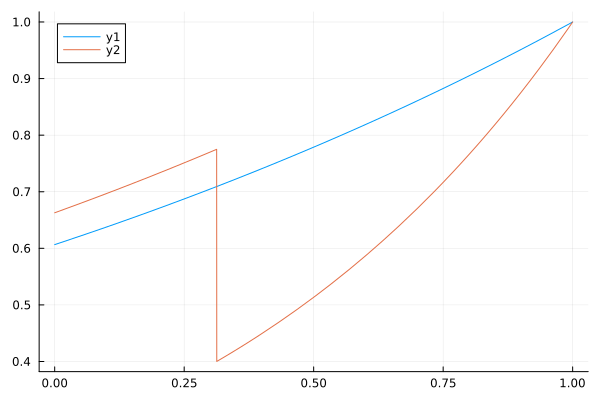

In [12]:
## overall trading probabilities without ai first then with ai
# in a every grad has expected quality in b tiers are distinguished
q_lot(x,b)

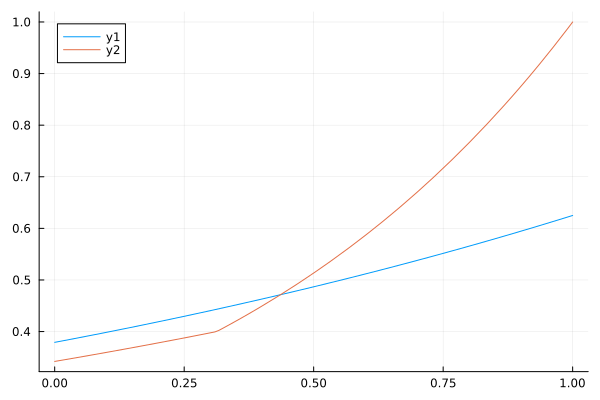

In [13]:
# expected surplus without then with
s_lot(x,b)

In [14]:
(integrate(i_surplus_with(x,b),0,1)-integrate(i_surplus_without(x,b),0,1))/integrate(i_surplus_without(x,b),0,1)

0.150422947133609

In [15]:
integrate(i_Prob_without(x,b),0,1)-integrate(i_Prob_with(x,b),0,1)

0.112537047772906